# EJERCICIO 2 - PRACTICA 2

In [2]:


 # configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)


In [4]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos


nombre_archivo = DATOS_DIR + 'Globos.csv' # archivo de globos

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
# print(df)
display(df)


,Color,Tamanio,Se_estira?,Edad,Inflado?
0,Amarillo,Chico,Si,Adulto,Si
1,Amarillo,Chico,Si,Niño,Si
2,Amarillo,Chico,No,Adulto,No
3,Amarillo,Chico,No,Niño,No
4,Amarillo,Grande,Si,Adulto,Si
5,Amarillo,Grande,Si,Niño,Si
6,Amarillo,Mediano,No,Adulto,No
7,Amarillo,Mediano,No,Niño,No
8,Rojo,Chico,Si,Adulto,Si
9,Rojo,Chico,Si,Niño,No


# Numerice los atributos de la siguiente forma: 
 - Color = 1 si es rojo y 0 si es amarillo
 - SeEstira? = 1 para Si y 0 para No
 - Edad = 1 si es adulto y 0 si es Nene
 -Tamanio = 0 si es Chico, 0.5 si es mediano y 1 si es grande

In [7]:
#

mapeo = {'Color': {'Amarillo':0, 'Rojo':1},
          'Se_estira?':{'Si':1, 'No':0},
          'Edad':{'Adulto':1, 'Niño':0},
        'Tamanio':{'Chico':0, 'Mediano':0.5, 'Grande':1}}

df.replace(mapeo, inplace=True)
print(df)



    Color  Tamanio  Se_estira?  Edad Inflado?
0       0      0.0           1     1       Si
1       0      0.0           1     0       Si
2       0      0.0           0     1       No
3       0      0.0           0     0       No
4       0      1.0           1     1       Si
5       0      1.0           1     0       Si
6       0      0.5           0     1       No
7       0      0.5           0     0       No
8       1      0.0           1     1       Si
9       1      0.0           1     0       No
10      1      0.5           0     1       No
11      1      0.5           0     0       No
12      1      1.0           1     1       Si
13      1      1.0           1     0       No
14      1      1.0           0     1       No
15      1      1.0           0     0       No


C:\Users\W10\AppData\Local\Temp\ipykernel_2068\25299150.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapeo, inplace=True)


# Grafico por categoria (si se pudo inflar o no)

Inflado?
No    10
Si     6
Name: count, dtype: int64


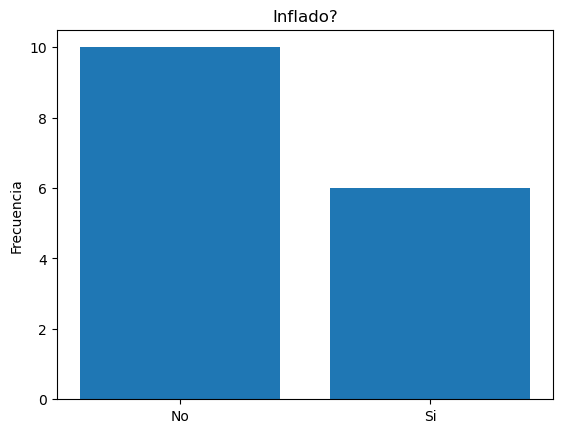

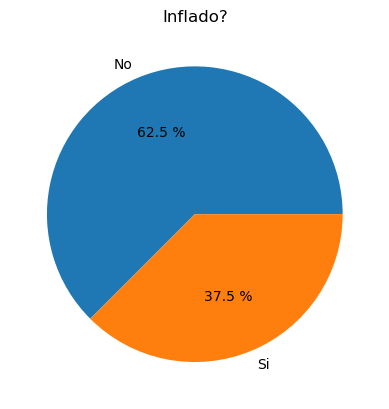

In [10]:
### Gráfico por Clase
import matplotlib.pyplot as plt  # Importa la librería para gráficos
import numpy as np  # Importa numpy

target = "Inflado?"
barras = df[target].value_counts()
print(barras)

plt.figure()
N = len(barras)
plt.bar(np.arange( N ), barras)  # Gráfico de barras
plt.title(target)      # Colocamos el título
plt.ylabel('Frecuencia')
# Colocamos las etiquetas del eje x
plt.xticks(np.arange( N ), barras.index)
plt.show()


plt.pie(barras,labels=barras.index, autopct="%0.1f %%")
plt.title(target)
plt.show()

# Separa características de entrenamiento y clase a predecir

In [12]:
# nuevo dataframe "datos" sin la columna "Inflado?" --> se hace para tener un dataframe unicamente de DATOS (para entrenar perceptron)
datos = df.drop('Inflado?',axis=1)

# extrae las clases del dataframe de forma que 'Si'=> 1 y 'No' => 0   ---> se obtienen los resultados de cada fila
etiquetas = (df['Inflado?']=='Si')*1

#### Indique cuáles de los siguientes perceptrones pueden clasificar correctamente todos los ejemplos normalizados del archivo

# Perceptron 1
### - W(color): 0,050 
### - W(tamaño): 0,006 
### - W(Se_estira?): -0,068
### - W(Edad): -0,047
### - b: 0,005

In [59]:
# Convertir la columna 'Inflado?' a binario
df['Inflado?'] = df['Inflado?'].apply(lambda x: 1 if x == 'Si' else 0)

# Separar las características y la etiqueta
X = df[['Color', 'Tamanio', 'Se_estira?', 'Edad']].values
y = df['Inflado?'].values

# Definir los pesos y el sesgo
weights = np.array([0.050, 0.006, -0.068, -0.047])
bias = 0.005

# Función de activación
def step_function(x):
    return 1 if x >= 0 else 0

# Predicción del perceptrón
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return step_function(linear_output)

# Evaluar el perceptrón en todos los ejemplos
predictions = np.array([predict(x, weights, bias) for x in X])

# Comparar las predicciones con las etiquetas reales
accuracy = np.mean(predictions == y)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(' ---------------')

# Mostrar resultados individuales
results = pd.DataFrame({
    'Color': df['Color'],
    'Tamanio': df['Tamanio'],
    'Se_estira?': df['Se_estira?'],
    'Edad': df['Edad'],
    'Real': y,
    'Predicción': predictions
})

# Añadir columna de aciertos
results['Correcto'] = results['Real'] == results['Predicción']


# Contar el número de aciertos
num_correctos = results['Correcto'].sum()
print(f'Número de predicciones correctas: {num_correctos} de {len(results)}')

print(results)

Accuracy: 62.50%
 ---------------
Número de predicciones correctas: 10 de 16
    Color  Tamanio  Se_estira?  Edad  Real  Predicción  Correcto
0       0      0.0           1     1     0           0      True
1       0      0.0           1     0     0           0      True
2       0      0.0           0     1     0           0      True
3       0      0.0           0     0     0           1     False
4       0      1.0           1     1     0           0      True
5       0      1.0           1     0     0           0      True
6       0      0.5           0     1     0           0      True
7       0      0.5           0     0     0           1     False
8       1      0.0           1     1     0           0      True
9       1      0.0           1     0     0           0      True
10      1      0.5           0     1     0           1     False
11      1      0.5           0     0     0           1     False
12      1      1.0           1     1     0           0      True
13      1    

# Perceptron 2
### - W(color): -0,494 
### - W(tamaño): -0.003 
### - W(Se_estira?): 0,722
### - W(Edad): 0,489
### - b: -0.4943

In [57]:
# Convertir la columna 'Inflado?' a binario
df['Inflado?'] = df['Inflado?'].apply(lambda x: 1 if x == 'Si' else 0)

# Separar las características y la etiqueta
X = df[['Color', 'Tamanio', 'Se_estira?', 'Edad']].values
y = df['Inflado?'].values

# Definir los pesos y el sesgo
weights = np.array([-0.494, -0.003, 0.722, 0.489])
bias = -0.4943

# Función de activación
def step_function(x):
    return 1 if x >= 0 else 0

# Predicción del perceptrón
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return step_function(linear_output)

# Evaluar el perceptrón en todos los ejemplos
predictions = np.array([predict(x, weights, bias) for x in X])

# Comparar las predicciones con las etiquetas reales
accuracy = np.mean(predictions == y)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(' ---------------')

# Mostrar resultados individuales
results = pd.DataFrame({
    'Color': df['Color'],
    'Tamanio': df['Tamanio'],
    'Se_estira?': df['Se_estira?'],
    'Edad': df['Edad'],
    'Real': y,
    'Predicción': predictions
})

# Añadir columna de aciertos
results['Correcto'] = results['Real'] == results['Predicción']


# Contar el número de aciertos
num_correctos = results['Correcto'].sum()
print(f'Número de predicciones correctas: {num_correctos} de {len(results)}')

print(results)

Accuracy: 62.50%
 ---------------
Número de predicciones correctas: 10 de 16
    Color  Tamanio  Se_estira?  Edad  Real  Predicción  Correcto
0       0      0.0           1     1     0           1     False
1       0      0.0           1     0     0           1     False
2       0      0.0           0     1     0           0      True
3       0      0.0           0     0     0           0      True
4       0      1.0           1     1     0           1     False
5       0      1.0           1     0     0           1     False
6       0      0.5           0     1     0           0      True
7       0      0.5           0     0     0           0      True
8       1      0.0           1     1     0           1     False
9       1      0.0           1     0     0           0      True
10      1      0.5           0     1     0           0      True
11      1      0.5           0     0     0           0      True
12      1      1.0           1     1     0           1     False
13      1    

# Perceptron 3
### - W(color): 0,06
### - W(tamaño): 0,004
### - W(Se_estira?): 0,1278
### - W(Edad): 0,021
### - b: -0,1132



In [50]:
# Convertir la columna 'Inflado?' a binario
df['Inflado?'] = df['Inflado?'].apply(lambda x: 1 if x == 'Si' else 0)

# Separar las características y la etiqueta
X = df[['Color', 'Tamanio', 'Se_estira?', 'Edad']].values
y = df['Inflado?'].values

# Definir los pesos y el sesgo
weights = np.array([0.06, 0.004, 0.1278, 0.021])
bias = -0.1132

# Función de activación
def step_function(x):
    return 1 if x >= 0 else 0

# Predicción del perceptrón
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return step_function(linear_output)

# Evaluar el perceptrón en todos los ejemplos
predictions = np.array([predict(x, weights, bias) for x in X])

# Comparar las predicciones con las etiquetas reales
accuracy = np.mean(predictions == y)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(' ---------------')

# Mostrar resultados individuales
results = pd.DataFrame({
    'Color': df['Color'],
    'Tamanio': df['Tamanio'],
    'Se_estira?': df['Se_estira?'],
    'Edad': df['Edad'],
    'Real': y,
    'Predicción': predictions
})

# Añadir columna de aciertos
results['Correcto'] = results['Real'] == results['Predicción']


# Contar el número de aciertos
num_correctos = results['Correcto'].sum()
print(f'Número de predicciones correctas: {num_correctos} de {len(results)}')

print(results)

Accuracy: 50.00%
 ---------------
Número de predicciones correctas: 8 de 16
    Color  Tamanio  Se_estira?  Edad  Real  Predicción  Correcto
0       0      0.0           1     1     0           1     False
1       0      0.0           1     0     0           1     False
2       0      0.0           0     1     0           0      True
3       0      0.0           0     0     0           0      True
4       0      1.0           1     1     0           1     False
5       0      1.0           1     0     0           1     False
6       0      0.5           0     1     0           0      True
7       0      0.5           0     0     0           0      True
8       1      0.0           1     1     0           1     False
9       1      0.0           1     0     0           1     False
10      1      0.5           0     1     0           0      True
11      1      0.5           0     0     0           0      True
12      1      1.0           1     1     0           1     False
13      1     

# Perceptron 4
### - W(color): 0,296
### - W(tamaño): 0,026
### - W(Se_estira?): -0,576
### - W(Edad): -0,287
### - b: 0,371




In [52]:
# Convertir la columna 'Inflado?' a binario
df['Inflado?'] = df['Inflado?'].apply(lambda x: 1 if x == 'Si' else 0)

# Separar las características y la etiqueta
X = df[['Color', 'Tamanio', 'Se_estira?', 'Edad']].values
y = df['Inflado?'].values

# Definir los pesos y el sesgo
weights = np.array([0.296, 0.026, -0.576, 0.287])
bias = 0.371

# Función de activación
def step_function(x):
    return 1 if x >= 0 else 0

# Predicción del perceptrón
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return step_function(linear_output)

# Evaluar el perceptrón en todos los ejemplos
predictions = np.array([predict(x, weights, bias) for x in X])

# Comparar las predicciones con las etiquetas reales
accuracy = np.mean(predictions == y)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(' ---------------')

# Mostrar resultados individuales
results = pd.DataFrame({
    'Color': df['Color'],
    'Tamanio': df['Tamanio'],
    'Se_estira?': df['Se_estira?'],
    'Edad': df['Edad'],
    'Real': y,
    'Predicción': predictions
})

# Añadir columna de aciertos
results['Correcto'] = results['Real'] == results['Predicción']


# Contar el número de aciertos
num_correctos = results['Correcto'].sum()
print(f'Número de predicciones correctas: {num_correctos} de {len(results)}')

print(results)

Accuracy: 12.50%
 ---------------
Número de predicciones correctas: 2 de 16
    Color  Tamanio  Se_estira?  Edad  Real  Predicción  Correcto
0       0      0.0           1     1     0           1     False
1       0      0.0           1     0     0           0      True
2       0      0.0           0     1     0           1     False
3       0      0.0           0     0     0           1     False
4       0      1.0           1     1     0           1     False
5       0      1.0           1     0     0           0      True
6       0      0.5           0     1     0           1     False
7       0      0.5           0     0     0           1     False
8       1      0.0           1     1     0           1     False
9       1      0.0           1     0     0           1     False
10      1      0.5           0     1     0           1     False
11      1      0.5           0     0     0           1     False
12      1      1.0           1     1     0           1     False
13      1     

# Perceptron 5
### - W(color): 0,994
### - W(tamaño): 0,006
### - W(Se_estira?): -1,466
### - W(Edad): -0,989
### - b: 0,988




In [54]:
# Convertir la columna 'Inflado?' a binario
df['Inflado?'] = df['Inflado?'].apply(lambda x: 1 if x == 'Si' else 0)

# Separar las características y la etiqueta
X = df[['Color', 'Tamanio', 'Se_estira?', 'Edad']].values
y = df['Inflado?'].values

# Definir los pesos y el sesgo
weights = np.array([0.994, 0.006, -1.466, -0.989])
bias = 0.988

# Función de activación
def step_function(x):
    return 1 if x >= 0 else 0

# Predicción del perceptrón
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return step_function(linear_output)

# Evaluar el perceptrón en todos los ejemplos
predictions = np.array([predict(x, weights, bias) for x in X])

# Comparar las predicciones con las etiquetas reales
accuracy = np.mean(predictions == y)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(' ---------------')

# Mostrar resultados individuales
results = pd.DataFrame({
    'Color': df['Color'],
    'Tamanio': df['Tamanio'],
    'Se_estira?': df['Se_estira?'],
    'Edad': df['Edad'],
    'Real': y,
    'Predicción': predictions
})

# Añadir columna de aciertos
results['Correcto'] = results['Real'] == results['Predicción']


# Contar el número de aciertos
num_correctos = results['Correcto'].sum()
print(f'Número de predicciones correctas: {num_correctos} de {len(results)}')

print(results)

Accuracy: 43.75%
 ---------------
Número de predicciones correctas: 7 de 16
    Color  Tamanio  Se_estira?  Edad  Real  Predicción  Correcto
0       0      0.0           1     1     0           0      True
1       0      0.0           1     0     0           0      True
2       0      0.0           0     1     0           0      True
3       0      0.0           0     0     0           1     False
4       0      1.0           1     1     0           0      True
5       0      1.0           1     0     0           0      True
6       0      0.5           0     1     0           1     False
7       0      0.5           0     0     0           1     False
8       1      0.0           1     1     0           0      True
9       1      0.0           1     0     0           1     False
10      1      0.5           0     1     0           1     False
11      1      0.5           0     0     0           1     False
12      1      1.0           1     1     0           0      True
13      1     

## El perceptron con mejor desempeño son los perceptrones 1 y 2 con un desempeño del 62.50 % , y el perceptron con el peor desempeño es el perceptron 4 con un desempeño de 12.5 %